In [1]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


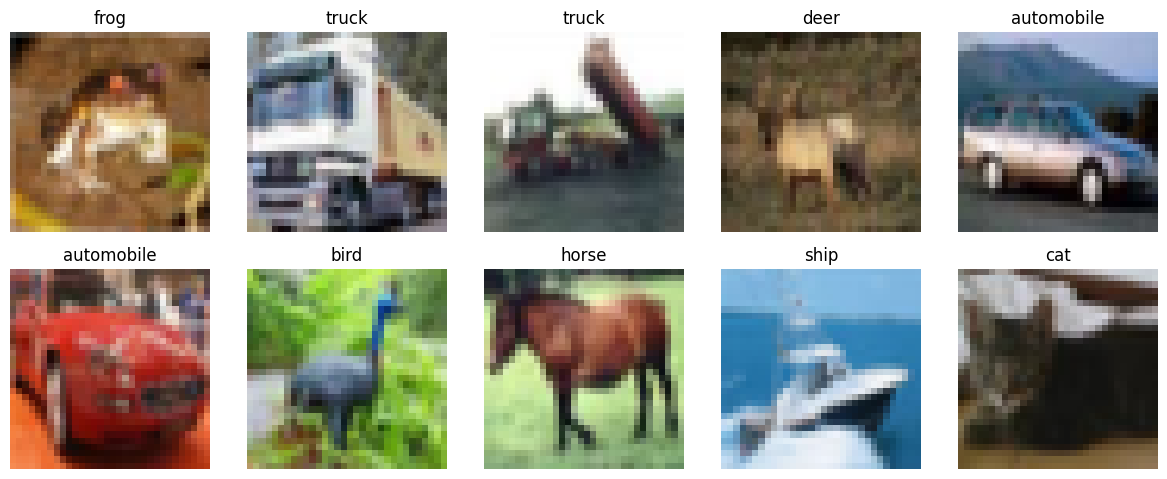

In [3]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create subplot with CIFAR-10 images
plt.figure(figsize=(12, 12))
for i in range(10):
    fig = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])  # CIFAR-10 images are already in shape (32, 32, 3), no need to reshape
    plt.title(class_names[y_train[i][0]])  # Use the corresponding class name
    plt.axis('off')  # Turn off the axis for better visualization
    
plt.tight_layout()
plt.show()


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_trainen = to_categorical(y_train, 10)
y_testen = to_categorical(y_test, 10)

In [6]:
########################################## NO CHANGE IN VGG16 FOR CIFAR 10 ###########################################

# model = models.Sequential()
# # First Convolutional Block
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Second Convolutional Block
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Third Convolutional Block
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Fourth Convolutional Block
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Fifth Convolutional Block
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the feature maps to prepare for the fully connected layers
# model.add(layers.Flatten())

# # Fully Connected Layers
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))

# # Output Layer
# model.add(layers.Dense(10, activation='softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(x_train, y_trainen, batch_size=128, epochs=20)

In [19]:
###################################### ADJUSTING VGG for CIFAR 10 ##################################################
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Pooling reduces to 16x16

# Second Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Reduces to 8x8

# Third Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Reduces to 4x4

# Flattening the feature map
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer for 10 classes (CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_trainen, batch_size=128, epochs=20)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.1463 - loss: 2.2209
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3125 - loss: 1.8266
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3761 - loss: 1.6729
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.4205 - loss: 1.5622
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.4537 - loss: 1.4939
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.4770 - loss: 1.4338
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.4917 - loss: 1.3967
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5118 - loss: 1.3611
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5178 - loss: 1.3288
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.5301 - loss: 1.2924
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5523 - loss: 1.2468
Epoch 12/20
391/391 ━━━━━━━━━━

In [8]:
# ############################################## IMPORTING VGG 16 FOR CIFAR 10 ############################################
# from tensorflow.keras.applications import VGG16

# vgg_base = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))

# # Freeze the layers of VGG16
# for layer in vgg_base.layers:
#     layer.trainable = False

# # Create a new model on top of the VGG16 base
# model = models.Sequential([
#     vgg_base,
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax')
# ])


# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(x_train, y_trainen,batch_size=128, epochs=20)


In [20]:
model.evaluate(x_train,y_trainen)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6817 - loss: 0.8950


[0.9022685289382935, 0.6788399815559387]

In [21]:
model.evaluate(x_test,y_testen)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6560 - loss: 0.9740


[0.9755693078041077, 0.6552000045776367]

In [22]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


In [23]:
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'ship')

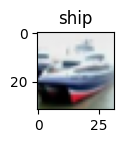

In [24]:
plt.figure(figsize=(1, 1))  # Set figure size for better visibility
plt.imshow(x_test[1]) 
plt.title(class_names[np.argmax(y_pred[1])])